In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import torch
from torch.utils.data import DataLoader, Dataset
import torchvision
from torchvision import transforms

In [4]:
print(torch.cuda.is_available())

True


In [4]:
train_data_file = "Brunel_BdJPsiKs_MagU_30k.csv"
data = pd.read_csv(train_data_file)
features = data.drop(["is_true_seed","has_MCParticle",
                      "has_MCParticle_not_electron",
                     "is_downstream_reconstructible_not_electron",
                     "seed_mva_value"] , axis=1).astype(np.float64)

target = data.is_downstream_reconstructible
features = features.drop(features.columns[0], axis=1)

In [5]:
featuresT = features[features.is_downstream_reconstructible == 1].drop(["is_downstream_reconstructible"], axis = 1)
featuresF = features[features.is_downstream_reconstructible == 0].drop(["is_downstream_reconstructible"], axis = 1)

In [6]:
def drawPlot(coll, binsnum, xmax = None, xmin = 0):
    T = featuresT[coll].values
    F = featuresF[coll].values
    if xmax != None:
        plt.hist(T, bins = binsnum, alpha=0.5, label='T', range = (xmin, xmax))
        plt.hist(F, bins = binsnum, alpha=0.5, label='F', range = (xmin, xmax))
    else:
        plt.hist(T, bins = binsnum, alpha=0.5, label='T')
        plt.hist(F, bins = binsnum, alpha=0.5, label='F')
    plt.legend(loc='upper right')
    plt.title(coll)
    plt.show()

In [7]:
featuresT.head(5)

,seed_chi2PerDoF,seed_p,seed_pt,seed_nLHCbIDs,seed_nbIT,seed_nLayers,seed_x,seed_y,seed_tx,seed_ty
1,0.354945,10085.622823,1345.148537,24.0,0.0,12.0,-393.699553,-284.193871,-0.129122,-0.037920
2,2.906524,2441.534682,1013.888408,24.0,0.0,12.0,-834.004914,-270.235334,-0.456235,-0.015198
3,3.234916,2604.073941,904.097232,24.0,0.0,12.0,-475.119652,-230.380918,-0.369728,-0.018967
5,1.006955,2192.137688,1073.852847,23.0,0.0,12.0,1150.390040,-134.681106,0.561625,-0.017649
6,1.072540,2665.828607,1207.615135,23.0,0.0,11.0,-1317.489095,-95.556751,-0.507878,-0.015790


In [8]:
featuresF.head(5)

,seed_chi2PerDoF,seed_p,seed_pt,seed_nLHCbIDs,seed_nbIT,seed_nLayers,seed_x,seed_y,seed_tx,seed_ty
0,1.447929,1849.101146,1083.522737,27.0,0.0,12.0,-1418.736880,-143.095899,-0.722093,-0.038671
4,0.842265,2644.554049,1068.602364,23.0,0.0,12.0,-899.187260,-101.826800,-0.440227,-0.036610
7,1.910106,1982.185052,1098.496848,23.0,0.0,12.0,1361.797957,-75.769376,0.665769,-0.002134
13,1.328705,14385.018759,1315.787289,16.0,0.0,9.0,-290.457946,-89.084344,-0.091253,-0.010492
15,1.456066,3281.858998,1153.820937,24.0,0.0,12.0,898.230142,144.265434,0.373432,0.039835


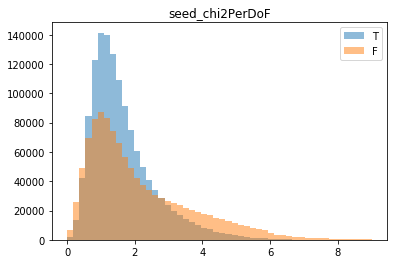

In [9]:
drawPlot("seed_chi2PerDoF", 50, 9)

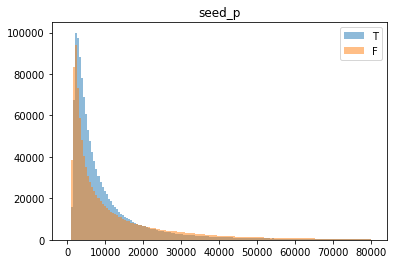

In [10]:
drawPlot("seed_p", 150, 80000)

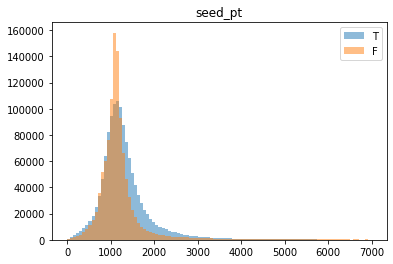

In [11]:
drawPlot("seed_pt", 100, 7000)

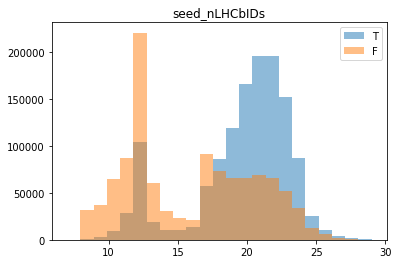

In [12]:
drawPlot("seed_nLHCbIDs", 23, 29, 7)

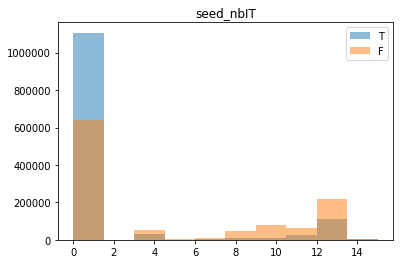

In [13]:
drawPlot("seed_nbIT", 10, 15)

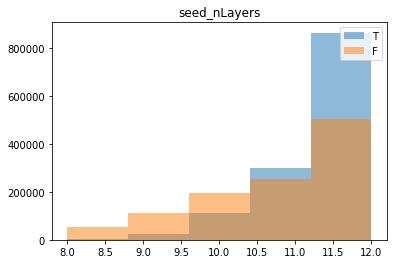

In [14]:
drawPlot("seed_nLayers", 5, 12, 8)

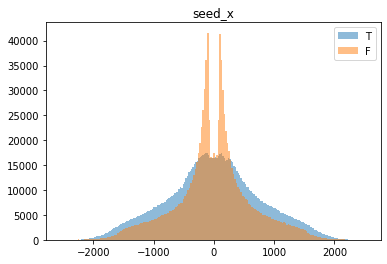

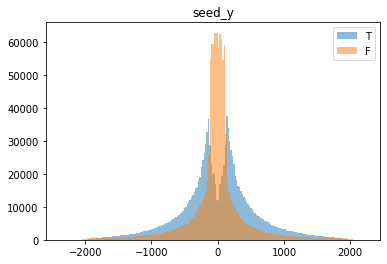

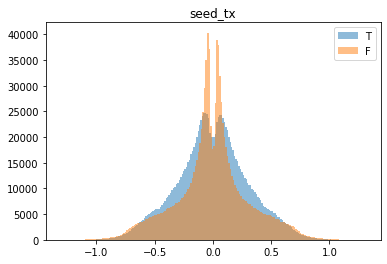

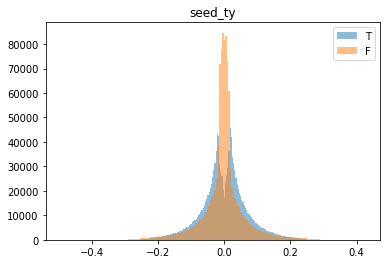

In [15]:
drawPlot("seed_x", 200)
drawPlot("seed_y", 200)
drawPlot("seed_tx", 200)
drawPlot("seed_ty", 200)

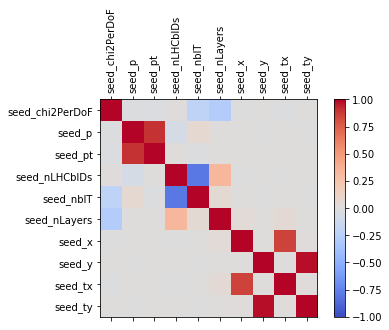

In [16]:
corr = featuresT.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(featuresT.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(featuresT.columns)
ax.set_yticklabels(featuresT.columns)
plt.show()

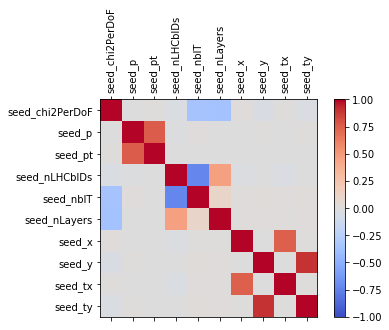

In [17]:
corr = featuresF.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(featuresF.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(featuresF.columns)
ax.set_yticklabels(featuresF.columns)
plt.show()

In [18]:
features = features.drop(["seed_p", "seed_nbIT", "seed_tx", "seed_ty"], axis = 1)
features.head()

,is_downstream_reconstructible,seed_chi2PerDoF,seed_pt,seed_nLHCbIDs,seed_nLayers,seed_x,seed_y
0,0.0,1.447929,1083.522737,27.0,12.0,-1418.736880,-143.095899
1,1.0,0.354945,1345.148537,24.0,12.0,-393.699553,-284.193871
2,1.0,2.906524,1013.888408,24.0,12.0,-834.004914,-270.235334
3,1.0,3.234916,904.097232,24.0,12.0,-475.119652,-230.380918
4,0.0,0.842265,1068.602364,23.0,12.0,-899.187260,-101.826800
